# Agenda
--- 
<p>What you might have to do before using a learner in `sklearn`:</p>
* Non-numerics transformed to numeric (tip: use applymap() method from `pandas`)
* Fill in missing values
* Standardization
* Normalization
* Encoding categorical features (e.g. one-hot encoding or dummy variables)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Why Standardization and Normalization is required?
- Common requirement for many machine learning estimators
- They might behave badly

In [2]:
# Standardization aka scaling
from sklearn import preprocessing, datasets

# Make sure we have iris loaded
iris = datasets.load_iris()


# Data and labels (target)
X, y = iris.data, iris.target

# Scale it to a gaussian distribution
X_scaled = preprocessing.scale(X)

# How does it look now
pd.DataFrame(X_scaled).head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [3]:
# let's just confirm our standardization worked (mean is 0 w/ unit variance)
pd.DataFrame(X_scaled).describe()

# Also could:
# print(X_scaled.mean(axis = 0))
# print(X_scaled.std(axis = 0))

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.637024e-15,-1.482518e-15,-1.623146e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


> To save our standardization and reapply later (say to the test set or some new data), create a transformer object like so:

```python

# Standardize through scaling
scaler = preprocessing.StandardScaler().fit(X_train)

# Apply to a new dataset (e.g. test set):
scaler.transform(X_test)
```

##  (Clean Data) and Transform Data

### Make the learning easier or better  beforehand -  feature reduction/selection/creation
* SelectKBest
* PCA
* One-Hot Encoder

### Selecting k top scoring features (also dimensionality reduction)

**1. Loading iris data**

In [4]:
# SelectKBest for selecting top-scoring features

from sklearn import datasets
from sklearn.feature_selection import SelectKBest, chi2

# Our nice, clean data (it's not always going to be this easy) - what's the function to load it?
iris = datasets.load_iris()
X, y = iris.data, iris.target

print('Original shape:', X.shape)

Original shape: (150, 4)


**2. Adding new column to our obervations**

In [5]:
# Let's add a NEW feature - a ratio of two of the iris measurements.
df = pd.DataFrame(X, columns = iris.feature_names)

# New feature is petal width / sepal width
df['petal width / sepal width'] = df['petal width (cm)'] / df['sepal width (cm)']

# Grab feature names + new one
new_feature_names = df.columns
print('New feature names:', list(new_feature_names))

# We've now added a new column to our data
X = np.array(df)

New feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'petal width / sepal width']


**3. Performing feature selection**

In [6]:
# chi2 is the statistical test to determine the dependence between 2 variables
# in this case its the amount of dependence between feature and target class
dim_red = SelectKBest(chi2, k = 3)
dim_red.fit(X, y)
X_t = dim_red.transform(X)

**4. Show scores, features selected and new shape**

In [7]:
# Show scores, features selected and new shape
print('Scores:', dim_red.scores_)
print('New shape:', X_t.shape)

Scores: [  10.81782088    3.59449902  116.16984746   67.24482759   23.61598059]
New shape: (150, 3)


**5. Get back the selected columns**

In [8]:
selected = dim_red.get_support() # boolean values
selected_names = new_feature_names[selected]

print('Top k features: ', list(selected_names))

Top k features:  ['petal length (cm)', 'petal width (cm)', 'petal width / sepal width']


**Note on scoring function selection in `SelectKBest` tranformations:**
* For regression - [f_regression](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression)
* For classification - [chi2](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html#sklearn.feature_selection.chi2), [f_classif](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html#sklearn.feature_selection.f_classif)


### Principal component analysis (aka PCA)
* Reduces dimensions (number of features), based on what information explains the most variance (or signal)
* Considered unsupervised learning
* Useful for very large feature space (e.g. say the botanist in charge of the iris dataset measured 100 more parts of the flower and thus there were 104 columns instead of 4)
* More about PCA on wikipedia [here](https://en.wikipedia.org/wiki/Principal_component_analysis)

In [9]:
# PCA for dimensionality reduction - Fill in the blanks

from sklearn import decomposition
from sklearn import datasets

iris = datasets.load_iris()

X, y = iris.data, iris.target

# Perform principal component analysis
# Selects the number of components such that the amount of variance 
#   that needs to be explained is greater than the percentage specified
pca = decomposition.PCA(0.95)
pca.fit(X)

# Apply pca to data - like SelectKBest above
X_t = pca.fit_transform(X)

# Check the dimensions of the transformed data in X_t
X_t.shape

(150, 2)

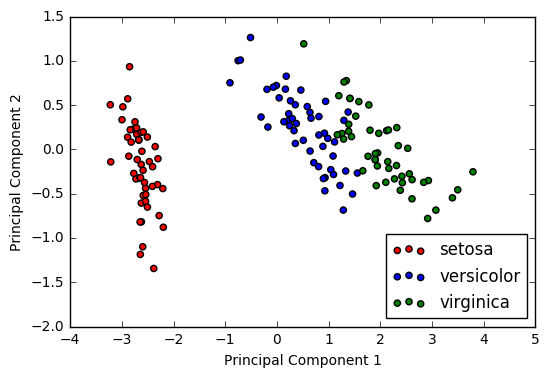

In [10]:
# Grab the first two principle components
x1, x2 = X_t[:, 0], X_t[:, 1]

# Please don't worry about details of the plotting below 
#  (note: you can get the iris names below from iris.target_names, also in docs)
c1 = np.array(list('rbg')) # colors
colors = c1[y] # y coded by color
classes = iris.target_names[y] # y coded by iris name
for (i, cla) in enumerate(set(classes)):
    xc = [p for (j, p) in enumerate(x1) if classes[j] == cla]
    yc = [p for (j, p) in enumerate(x2) if classes[j] == cla]
    cols = [c for (j, c) in enumerate(colors) if classes[j] == cla]
    plt.scatter(xc, yc, c = cols, label = cla)
    plt.ylabel('Principal Component 2')
    plt.xlabel('Principal Component 1')
plt.legend(loc = 4)

### More feature selection methods [here](http://scikit-learn.org/stable/modules/feature_selection.html)

### One Hot Encoding
* It's an operation on feature labels - a method of dummying variable
* Expands the feature space by nature of transform - later this can be processed further with a dimensionality reduction (the dummied variables are now their own features)
* FYI:  One hot encoding variables is needed for python ML module `tenorflow`
* Can do this with `pandas` method or a `sklearn` one-hot-encoder system

<img src='images/before_one_hot_encoding.png' alt="Smiley face" width="200">

<img src='images/after_one_hot_encoding.png' alt="Smiley face" width="200">

### `pandas` method

In [11]:
# Dummy variables with pandas built-in function

import pandas as pd
from sklearn import datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

# Convert to dataframe and add a column with iris species name
data = pd.DataFrame(X, columns = iris.feature_names)
data['target_name'] = iris.target_names[y]

df = pd.get_dummies(data, prefix = ['target_name'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_name_setosa,target_name_versicolor,target_name_virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0
